In [655]:
import numpy as np
import pandas as pd

**Load data**

In [656]:
ltc = pd.read_csv('../data/bc_ltc_final.csv')
odhf = pd.read_excel('../data/odhf_ltc.xlsx')

In [657]:
ltc[ltc.latitude.isnull()]

,FACILITY_NAME,Number of dead,HCC_CODE,HLTH_AUTH,STREET_ADDRESS,CITY,POSTAL,PHONE,OPEN_DATE,COUNCIL,...,INFRACTIONS_OTHER,outbreak_status,point,latitude,longitude,residents_council,family_council,accreditation,home_type,years_operating


In [658]:
odhf_bc = odhf[odhf['province'] == 'bc']

In [659]:
odhf_bc.columns

Index(['index', 'facility_name', 'source_facility_type', 'odhf_facility_type',
       'provider', 'unit', 'street_no', 'street_name', 'postal_code', 'city',
       'province', 'source_format_str_address', 'CSDname', 'CSDuid', 'Pruid',
       'latitude', 'longitude'],
      dtype='object')

In [660]:
ltc['facility_name'] = ltc.FACILITY_NAME.str.lower()

**Correct some name discrepancies in odhf**

In [661]:
def rightsplit(x):
    hold = x.split('ó')
    try:
        return hold[1].lstrip()
    except IndexError:
        return hold[0]
    
    
odhf_bc['facility_name'] = odhf_bc.facility_name.map(lambda x: rightsplit(x))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [662]:
odhf_bc.facility_name

115                 harmony court care centre
116                              echo village
117                          fir park village
118                           all care canada
119                  amherst private hospital
                        ...                  
305                            westview place
306                        william rudd house
307                    willingdon care centre
308    wrinch memorial hospital extended care
309                    yaletown house society
Name: facility_name, Length: 195, dtype: object

**Merge**

In [663]:
ltc_odhf = pd.merge(ltc, odhf_bc, on = 'facility_name', how = 'outer')

In [664]:
print("merge: {}, odhf_bc: {}, ltc: {}".format(len(ltc_odhf), len(odhf_bc), len(ltc)))

merge: 379, odhf_bc: 195, ltc: 297


**How many facilities are in odhf are not in the ltc data?**

In [665]:
missing = list(set(odhf_bc.facility_name.unique()) - set(ltc.facility_name.unique()))
len(missing)

82

**How many facilities are in the ltc csv are not in the odhf?**

In [666]:
missing2 = list(set(ltc.facility_name.unique()) - set(odhf_bc.facility_name.unique()))
len(missing2)
# missing2

184

In [667]:
odhf_bc.facility_name.replace({'bradley centre': 'bradley center',
                             'parkview place enderby': 'parkview place',
                             'dr. andrew pavilion' : 'dr. andrew pavilion - summerland health centre',
                             'priory (hiscock & heritage woods)' : 'the priory - heritage woods',
                              'st vincentís: brock fahrni' : 'st. vincent\'s - brock fahrni pavilion',
                              'pine grove care centre' : 'pine grove seniors community',
                             'the views' : 'the views - st. joseph\'s general hospital',
                             'fort langley seniors village' : 'fort langley seniors community',
                             'selkirk place' : 'selkirk seniors village',
                             'kiwanis lodge' : 'kiwanis village lodge',
                             'brandtís creek mews' : 'brandt\'s creek mews',
                              'hilton villa care centre' : 'hilton villa seniors community',
                              'bevan lodge' : 'bevan village',
                              'discovery harbour care centre' : 'discovery harbour seniors community',
                              'the cascades' : 'the cascades care community',
                             'eagle park health care centre': 'eagle park health care facility',
                             'cottage-worthington pavilion' : 'cottage and worthington pavilions - msa hospital',
                             'evergreen baptist care home' : 'evergreen - the terraces / the pointe',
                             'elim village' : 'elim village - the harrison / harrison west',
                              'purdy pavilion' : 'purdy pavilion - ubc hospital',
                             'lake country lodge ltd.' : 'lake country lodge',
                             'eagle ridge manor' : 'eagle ridge manor - port moody',
                             'shorncliffe intermediate care facility' : 'shorncliffe',
                             'burnaby fair haven' : 'fair haven - burnaby',
                             'gateby intermediate care facility' : 'the gateby',
                             'wrinch memorial hospital extended care' : 'wrinch memorial hospital',
                             'sunridge place' : 'sunridge place seniors community',
                             'mountain view manor' : 'mountain view manor - delta hospital',
                             'vancouver fair haven' : 'fair haven - vancouver',
                             'cartier house' : 'cartier house seniors community',
                             'minto house' : 'minto house - arrow lakes hospital',
                             'queenís park care centre' : 'queen\'s park care centre',
                             'the madison' : 'the madison care centre',
                             'langley memorial hospital residential services':'Langley Memorial Hospital ECU'.lower(),
                             'polson':'polson residential care - vernon jubilee hospital',
                             'peace portal lodge' : 'peace portal seniors village',
                             'gateway lodge' : 'gateway lodge residential care',
                             'powell river general hospital evergreen extended care unit' : 'Evergreen Extended Care - Powell River Hospital'.lower(),
                             'mariposa lodge' : 'mariposa gardens',
                             'haro park centre society' : 'haro park centre',
                             'oyster harbour care centre' : 'oyster harbour seniors community',
                             'yaletown house society' : 'yaletown house',
                             'stanford place': 'stanford seniors village',
                             'wexford creek' :'wexford creek seniors community',
                             'mckinney place' : 'McKinney Place - South Okanagan General Hospital'.lower(),
                             'kinsmen place lodge': 'kinsmen lodge',
                             'jackson house' : 'Jackson House - Ashcroft Hospital and Health Centre'.lower(),
                             'brookhaven extended care unit and chronic behavior disorder unit' : 'brookhaven care centre',
                             'chetwynd multilevel care unit' : 'chetwynd hospital and health centre',
                             'banfield pavilion' : 'Banfield Pavilion - Vancouver General Hospital'.lower(),
                             'piccadilly care centre' : 'piccadilly seniors community',
                             'kiwanis care centre new westminster' : 'kiwanis care centre',
                             'sunnybank retirement centre' : 'sunnybank retirement home',
                             'poplar ridge pavilion' : 'Poplar Ridge Pavilion - Kootenay Boundary Hospital'.lower(),
                             'st vincentís: langara' : 'st. vincent\'s - langara',
                             'the heights at mt. view' : 'the heights at mount view',
                             'overlander extended care hospital' : 'overlander residential care',
                             'st. michaelís centre' : 'st. michael\'s centre',
                             'mill site lodge and fischer place' : 'fischer place/mill site lodge',
                             'langley gardens retirement community' : 'langley gardens',
                             'peace arch hospital residential care' : 'Hogg and Weatherby Pavilions - Peace Arch Hospital'.lower(),
                             'spring valley care centre' : 'spring valley seniors community',
                             'cerwydden care' : 'cerwydden seniors community',
                             'kiwanis care centre north vancouver' : 'berkley care centre',
                              'sherwood crescent manor' : 'sherwood crescent manor - the oxfored'}, inplace = True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [668]:
# ltc_odhf = pd.merge(ltc, odhf_bc, on = 'facility_name', how = 'inner')
missing2 = list(set(odhf_bc.facility_name.unique()) - set(ltc.facility_name.unique()))
print("length :", len(missing2), missing2)

length : 18 ['vjh - chronic behaviour disorder unit', 'evergreen hamlets', 'burquitlam lions care centre', 'the oxford', 'highland lodge', 'retirement concepts', 'lynn valley lodge', 'amherst private hospital', 'anderson manor', 'all care canada', 'island health', 'westview place', 'cariboo memorial hospital - residential beds', 'sherwood crescent manor - the oxfored', 'false creek residence', 'the hamlets at vernon', 'the salvation army sunset lodge', 'steveston residence']


**Merge again**

In [669]:
ltc_odhf = pd.merge(ltc, odhf_bc, on = 'facility_name', how = 'outer')
print("merge: {}, odhf_bc: {}, ltc: {}".format(len(ltc_odhf), len(odhf_bc), len(ltc)))

merge: 316, odhf_bc: 195, ltc: 297


### Clean

**Drop completely null columns**

In [670]:
ltc_odhf.dropna(axis=1, how = 'all', inplace = True)

**Complete missing information where possible**

* Number of dead = 0
* outbreak_status = 'No'

In [671]:
ltc_odhf['Number of dead'].fillna(0, inplace = True)
ltc_odhf['outbreak_status'].fillna('no', inplace = True)

 * Drop unneccessary cols

In [672]:
ltc_odhf.drop(columns = ['FACILITY_NAME', 'index'], inplace = True)

* Fill `CITY` (from ltc data, 20 are missing) with `city` (from odhf, only 20 are filled) then drop `city`
* Fill `POSTAL_CODE` with `postal_code` and drop

In [673]:
# CITY
ltc_odhf.CITY.fillna(ltc_odhf.city, inplace = True)

#POSTAL_CODE
ltc_odhf.POSTAL.fillna(ltc_odhf.postal_code, inplace = True)
ltc_odhf.drop(columns = ['postal_code', 'city'], inplace = True)

* Fill `HLTH_AUTH` by city

In [674]:
# create a dictionary of health auths and cities
HA_dict = {k: g["CITY"].unique().tolist() for k,g in ltc_odhf.groupby("HLTH_AUTH")}

# if na's exist in HEALTH_AUTH, return the key for the city value
def get_key(val): 
    try:
        for key, value in HA_dict.items(): 
            for v in value:
                 if v == val: 
                    return key
    except KeyError:
        print(val, "not assigned")

def health_auth(df):
    for entry in df[df.HLTH_AUTH.isnull()].CITY:
        print(entry)
        return get_key(entry.title())
        
        

In [675]:
health_auth(ltc_odhf)

sidney


'Vancouver Island Health'

In [676]:
HA_tofill = health_auth(ltc_odhf)
ltc_odhf.HLTH_AUTH.fillna(HA_tofill, inplace = True)

sidney


In [677]:
ltc_odhf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 315
Data columns (total 83 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number of dead           316 non-null    float64
 1   HCC_CODE                 298 non-null    object 
 2   HLTH_AUTH                316 non-null    object 
 3   STREET_ADDRESS           298 non-null    object 
 4   CITY                     316 non-null    object 
 5   POSTAL                   316 non-null    object 
 6   PHONE                    298 non-null    object 
 7   OPEN_DATE                289 non-null    object 
 8   COUNCIL                  291 non-null    object 
 9   ACCRED_STATUS            298 non-null    object 
 10  BEDS_PRIVATE             298 non-null    float64
 11  BEDS_PUBLIC              298 non-null    float64
 12  BEDS_TOTAL               298 non-null    float64
 13  ROOMS_PRIVATE            298 non-null    float64
 14  ROOMS_SEMI               2

### Investigate missing homes 

In [678]:
ltc_odhf[ltc_odhf.STREET_ADDRESS.isnull()].facility_name.tolist()

['all care canada',
 'amherst private hospital',
 'anderson manor',
 'burquitlam lions care centre',
 'cariboo memorial hospital - residential beds',
 'evergreen hamlets',
 'the hamlets at vernon',
 'highland lodge',
 'island health',
 'lynn valley lodge',
 'false creek residence',
 'steveston residence',
 'retirement concepts',
 'sherwood crescent manor - the oxfored',
 'the oxford',
 'the salvation army sunset lodge',
 'vjh - chronic behaviour disorder unit',
 'westview place']

LTC | Reason for removal
----|--------
amherst private hospital | hospital
burquitlam lions care centre | [closed](https://www.tricitynews.com/news/funding-for-burquitlam-lions-care-centre-ends-next-summer-1.2043040)
cariboo memorial hospital - residential beds | hospital
'vjh - chronic behaviour disorder unit' | hospital
island health | not found
lynn valley lodge | not a formal LTC [article](https://lynnvalleylife.com/blog/lynn-valley-masons-welcome-others-to-join-lodge/)
false creek residence | residence for independent living
steveston residence | residence for independent living

LTC | Source of info
-----|-------------
anderson manor | [bc.gov](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/index/160)
the hamlets at vernon | [IH pdf](https://www.interiorhealth.ca/AboutUs/MediaCentre/NewsReleases/Documents/Construction%20begins%20on%20new%20Vernon%20residential%20care%20home.pdf)
kiwanis care centre north van - ***name change*** | [article](http://www.vch.ca/about-us/news/news-releases/kiwanis-care-centre-celebrates-20-years-and-a-new-name-berkley-care-centre)
highland lodge | [bc.gov](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/index/22)
salvation army sunset lodge | [bc.gov](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/index/184)
sherwood crescent manor / the oxford | are the same [1](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/bycommunity/2) [2](http://tcgcare.com/theoxfordseniorcare)
westview place | [IH](https://www.interiorhealth.ca/FindUs/_layouts/FindUs/service.aspx?svcloc=Westview%20Extended%20Care)

In [679]:
to_drop = ['amherst private hospital',
          'burquitlam lions care centre',
 'cariboo memorial hospital - residential beds',
          'the oxford',
          'vjh - chronic behaviour disorder unit',
          'island health',
          'lynn valley lodge',
          'false creek residence',
          'steveston residence']

In [680]:
ltc_odhf2 = ltc_odhf.set_index('facility_name').drop(index = to_drop)

**Merge collected info for missing ltcs**

In [681]:
# info = pd.read_csv('../data/ltc_missing_9_info.csv')

In [682]:
# make dict of info then merge


**Remove hospitals**

In [683]:
ltc_odhf2.reset_index(inplace = True)
ltc_odhf3 = ltc_odhf2[~ltc_odhf2.facility_name.str.contains("hospital")]

**Export**

In [684]:
ltc_odhf3.set_index('facility_name', inplace = True)
ltc_odhf3.to_csv('../data/bc_ltc_odhf_final.csv')

### SUMMARY

---

**With hospitals:** 316

**Without hospitals:** 265

**Without odhf additions:** 254

### To Do:

 * hilsock and heritage woods are separate in ODHF - duplicate priory for hilsock - <mark>*temporarily removed*</mark>
 * update data

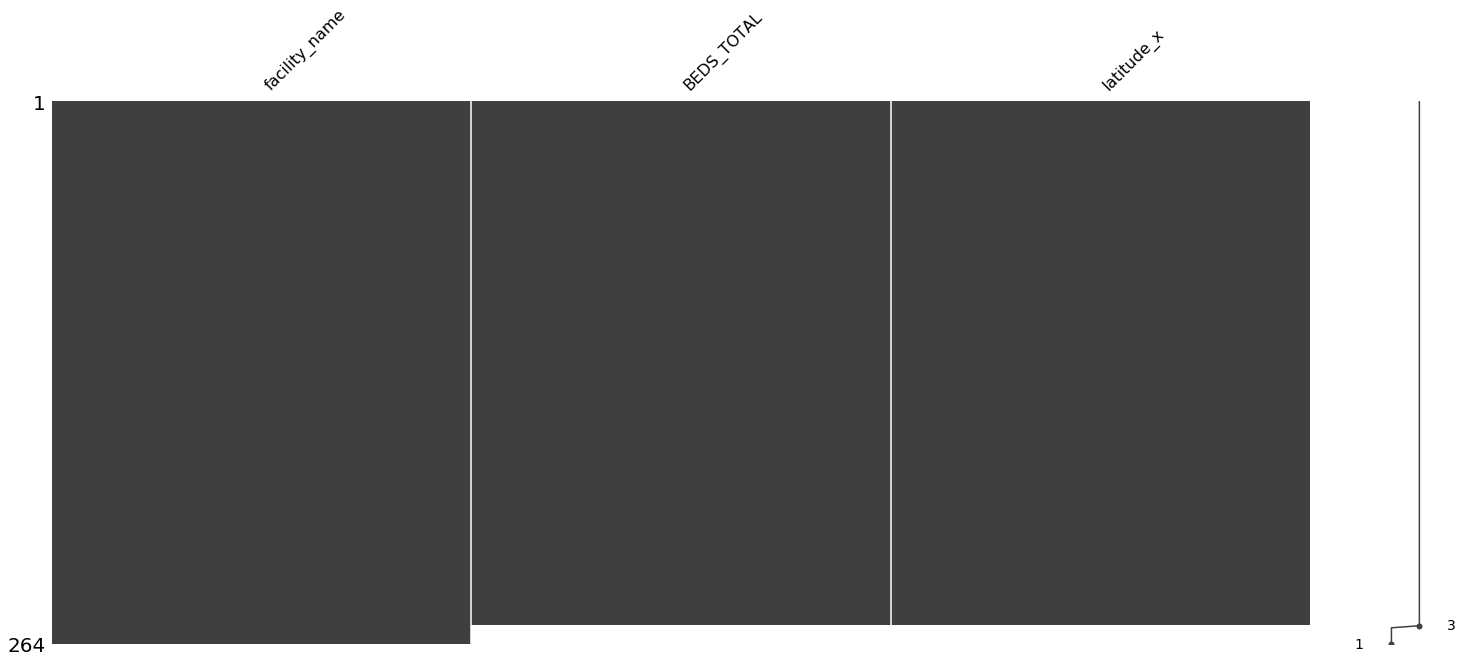

In [685]:
import missingno as msno

msno.matrix(ltc_odhf3.reset_index()[['facility_name', 'BEDS_TOTAL', 'latitude_x']])